<a href="https://colab.research.google.com/github/Risha-art/MAT-422/blob/main/HW_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1.3.1. QR Decomposition**##

QR decomposition is a least squares problem, returning to linear regression. The method solves the linear least squares problem and is the basis for a particular eigenvalue algorithm.

Consider a square matrix $A$ decomposed as $A=QR$ where $Q$ is an orthogonal matrix. This means $Q^T = Q^-1$ and $R$ is an upper triangular matrix.

In [10]:
import numpy as np
#We begin by transforming matrix A into orthonornal columns using the Gram-Schmidt process.
A = [ [2,3], [2,4],
  [1,1]]
print("Set matrix A = ", A)
#We want to use the formula A = QR, so we must find Q.
u1 = np.array([2,2,1])
u2 = np.array([3,4,1])
print("Let u1 and u2 equal to the columns of A: ", u1, u2)
#Apply Gramt-Scmidt process

v1 = u1
print("Set u1 as v1:", v1)

v2 = u2 - (np.dot(u2,v1)/ np.dot(v1,v1)) * v1
print("Calculate v2 = ", v2)

print("These two vectors form an orthogonal basis.But if we want an orthonormal basis, we divide each vector by its length.")

w1 = v1/ np.sqrt(np.dot(v1,v1))
w2 = v2/ np.sqrt(np.dot(v2,v2))

print("These are the two vectors, w1 and w2, that form an orthonormal basis: \n", w1,w2)

Q = [ [0.66666667, 0.66666667, 0.33333333],[-0.33333333, 0.66666667,-0.66666667]]
print("Matrix Q are column vectors w1 and w2 together:", Q)
#Solve for matrix R by the following evaluations: A = QR => Q^T * A = IR
#Solve for matrix R by multiplying the transpose matrix of Q with matrix A.
R = np.dot(Q, A)
print("Matrix R is: ", R) #how to have less decimals?

Set matrix A =  [[2, 3], [2, 4], [1, 1]]
Let u1 and u2 equal to the columns of A:  [2 2 1] [3 4 1]
Set u1 as v1: [2 2 1]
Calculate v2 =  [-0.33333333  0.66666667 -0.66666667]
These two vectors form an orthogonal basis.But if we want an orthonormal basis, we divide each vector by its length.
These are the two vectors, w1 and w2, that form an orthonormal basis: 
 [0.66666667 0.66666667 0.33333333] [-0.33333333  0.66666667 -0.66666667]
Matrix Q are column vectors w1 and w2 together: [[0.66666667, 0.66666667, 0.33333333], [-0.33333333, 0.66666667, -0.66666667]]
Matrix R is:  [[3.00000001e+00 5.00000002e+00]
 [1.00000001e-08 1.00000002e+00]]


##**1.3.2. Least Squares Problems**##

The least squares method is a parameter estimation method in regression analysis that minimizes the sum of squares of residuals (a residual is the difference between an observed value and fitted value provided by a model) made in the results of each individual equation.

We will illustrate this method in the following example.


2.424596549805231 -0.5000556483027279
[1.         1.55555556 2.11111111 2.66666667 3.22222222 3.77777778
 4.33333333 4.88888889 5.44444444 6.        ]
[ 1.9245409   3.27153898  4.61853707  5.96553515  7.31253323  8.65953132
 10.0065294  11.35352748 12.70052557 14.04752365]


<function matplotlib.pyplot.show(close=None, block=None)>

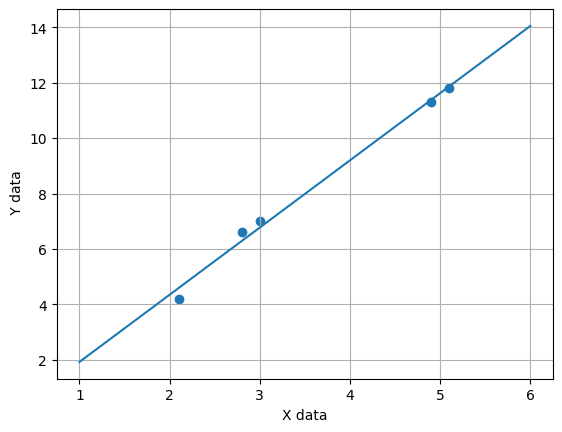

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([2.1,2.8,3.0,4.9,5.1])
y = np.array([4.2,6.6,7,11.3,11.8])

m,b = np.polyfit(x,y,1)
print(m,b)
xd = np.linspace(1,6,10)
print(xd)
yd = m*xd+b
print(yd)

plt.scatter(x,y)
plt.plot(xd,yd)
plt.title("Least Squares Fit to Data")
plt.xlabel('X data')
plt.ylabel(' Y data')
plt.grid()
plt.show

##**1.3.3. Linear Regression**##

Linear regression is a type of regression model that assumes a linear relationship between the target and futures, while least squares regression is a method used to locate optimal parameters for a linear regression model.

The following instance will illustrate a linear regression model as opposed to a least squares method fit.

In [14]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
iris = iris[['petal_length', 'petal_width']]

In [17]:
iris

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


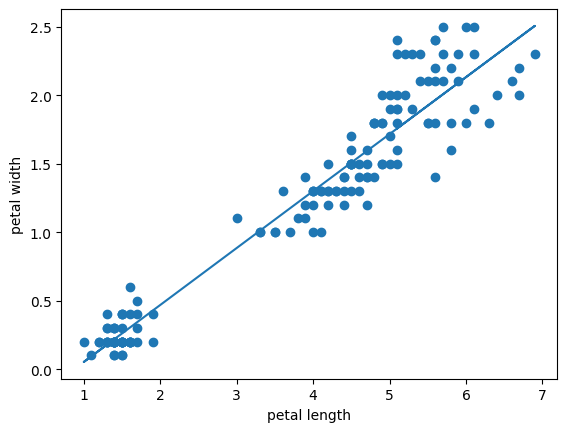

In [19]:
X = iris['petal_length']
Y = iris['petal_width']
import matplotlib.pyplot as plt
from scipy import stats
plt.scatter(X,Y)
plt.xlabel("petal length")
plt.ylabel("petal width")

slope, intercept, r, p, std_err = stats.linregress(X, Y)

def myfunc(X):
  return slope * X + intercept

mymodel = list(map(myfunc, X))

plt.plot(X, mymodel)
plt.show()